In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import root_mean_squared_error
random.seed(25)

C:\Users\okial\AppData\Local\Temp\ipykernel_19096\3943134162.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_excel("../Dataset/sleep_dataset_enhanced.xlsx")
df_BrainWtNonZero = df.loc[df.BrainWt > 0]

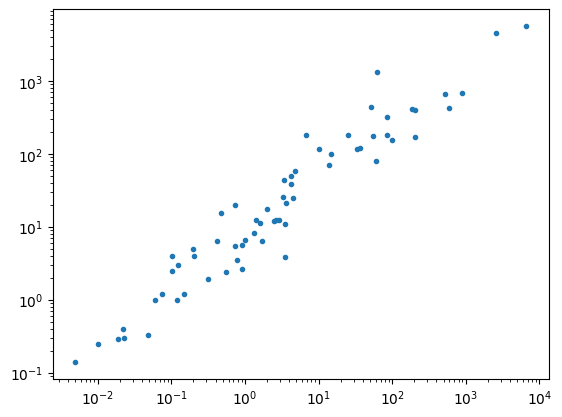

In [3]:
plt.plot(df_BrainWtNonZero.BodyWt,df_BrainWtNonZero.BrainWt,'.')
plt.yscale('log')
plt.xscale('log')
plt.show()

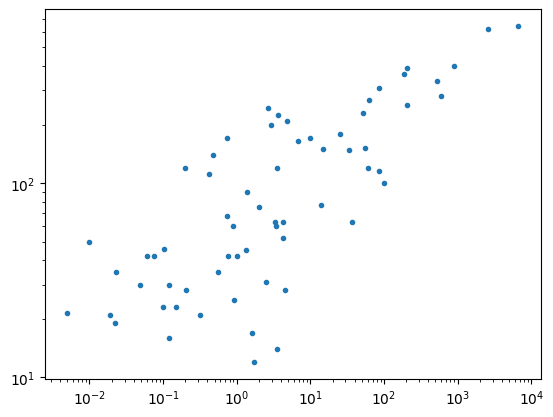

In [4]:
plt.plot(df_BrainWtNonZero.BodyWt,df_BrainWtNonZero.Gestation,'.')
plt.yscale('log')
plt.xscale('log')
plt.show()

In [5]:
train_data = np.log(df_BrainWtNonZero[['BrainWt','BodyWt','Gestation']])

In [6]:
linreg = LinearRegression()

# Independant variables
train_data_x = train_data[['BodyWt','Gestation']]
# Dependant variable
train_data_y = train_data['BrainWt']

#training the model
linreg.fit(train_data_x,train_data_y)

# Computing the BrainWt for the whole dataset
test_data = np.log(df[['BodyWt','Gestation']])
df['BrainWt_computed'] = linreg.predict(test_data)

In [7]:
# Computing the log for BodyWt in the original dataset
df['BodyWt'] = np.log(df['BodyWt'])

# Computing the log for the non zeros values in BrainWt
df.loc[df.BrainWt!=0,'BrainWt'] = np.log(df.loc[df.BrainWt!=0,'BrainWt'])

# Replace the zeros with the computed values
df.loc[df.BrainWt==0,'BrainWt'] = df.loc[df.BrainWt == 0,'BrainWt_computed']
df[['BrainWt','BrainWt_computed']]

# Get rid of the column of the computed BrainWt
df.drop(columns= 'BrainWt_computed' ,inplace = True)

In [14]:
# function to classify the conservation statuses in 3 categories (high risk, low risk and domesticated)
def conservation_classifier (status):
    if (status in ['en','vu','cd','cr']):
        return "high risk"
    elif (status in ['nt','lc']):
        return "low risk"

In [15]:
# Classification of the Conservation column
for status in ['en','vu','cd','cr','nt','lc']:
    df.loc[df.Conservation == status,'Conservation'] = conservation_classification(status)

df.Conservation.value_counts()

Conservation
low risk        57
high risk       20
domesticated    10
Name: count, dtype: int64

In [22]:
# get dummies to transform the categorical conservation in numerical
df[['high risk','low risk']] = pd.get_dummies(df.Conservation,drop_first=True,dtype=np.uint8)

# get rid of the Conservation column
df.drop(columns='Conservation',inplace=True)

,Species,Genus,Order,Family,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger,high risk,low risk
0,African elephant,Loxodonta,Proboscidea,Elephantidae,herbi,high risk,8.802973,8.650325,3.3,20.7,NaN,NaN,38.6,645.0,3.0,5.0,3.0,1,0
1,African giant pouched rat,Cricetomys,Rodentia,Nesomyidae,omni,low risk,0.000000,1.887070,8.3,15.7,6.3,2.0,4.5,42.0,3.0,1.0,3.0,0,1
2,African striped mouse,Rhabdomys,Rodentia,Muridae,omni,low risk,-3.123566,-0.308099,8.7,15.3,NaN,NaN,2.0,23.0,NaN,NaN,NaN,0,1
3,Arctic fox,Vulpes,Carnivora,Canidae,carni,low risk,1.217876,3.795489,12.5,11.5,NaN,NaN,14.0,60.0,1.0,1.0,1.0,0,1
4,Arctic ground squirrel,Spermophilus,Rodentia,Sciuridae,herbi,low risk,-0.083382,1.740466,16.6,7.4,NaN,NaN,11.0,25.0,5.0,2.0,3.0,0,1


In [26]:
df[['Conservation','high risk','low risk']].head(30)

,Conservation,high risk,low risk
0,high risk,1,0
1,low risk,0,1
2,low risk,0,1
3,low risk,0,1
4,low risk,0,1
5,high risk,1,0
6,low risk,0,1
7,low risk,0,1
8,low risk,0,1
9,high risk,1,0


In [27]:
df.isna().sum()

Species          0
Genus            0
Order            0
Family           0
Vore             0
Conservation     0
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming     40
Dreaming        24
LifeSpan         0
Gestation        0
Predation       29
Exposure        29
Danger          29
high risk        0
low risk         0
dtype: int64